# YOLO Image Classification Analysis


In [1]:
import os
import glob
import numpy as np
import torch
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from ultralytics import YOLO
from PIL import Image
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [1]:
from ultralytics import YOLO

model = YOLO("yolo11x-cls.pt")   # or any other .pt file

# Short summary (layers + param counts)
model.info()

# Detailed, layer‑by‑layer summary
# model.info(detailed=False)


YOLO11x-cls summary: 176 layers, 29,637,064 parameters, 0 gradients, 112.0 GFLOPs


(176, 29637064, 0, 112.0110592)

## Load and Configure YOLO Classification Model

In [3]:
CLASS_DIRS = {
    "big cat":r"D:\SPRING 2025\Deep Learning\PROJECT\Datasets_MAIN\test_dataset\big cat",
    "deer": r"D:\SPRING 2025\Deep Learning\PROJECT\Datasets_MAIN\test_dataset\deer",
    "bear": r"D:\SPRING 2025\Deep Learning\PROJECT\Datasets_MAIN\test_dataset\bear",
    "big dog": r"D:\SPRING 2025\Deep Learning\PROJECT\Datasets_MAIN\test_dataset\big dog"
}
model = YOLO("yolo11x-cls.pt")  #yolo classifier
conf_threshold = 0.25 

print(f"Class names: {model.names}")  

Class names: {0: 'tench', 1: 'goldfish', 2: 'great_white_shark', 3: 'tiger_shark', 4: 'hammerhead', 5: 'electric_ray', 6: 'stingray', 7: 'cock', 8: 'hen', 9: 'ostrich', 10: 'brambling', 11: 'goldfinch', 12: 'house_finch', 13: 'junco', 14: 'indigo_bunting', 15: 'robin', 16: 'bulbul', 17: 'jay', 18: 'magpie', 19: 'chickadee', 20: 'water_ouzel', 21: 'kite', 22: 'bald_eagle', 23: 'vulture', 24: 'great_grey_owl', 25: 'European_fire_salamander', 26: 'common_newt', 27: 'eft', 28: 'spotted_salamander', 29: 'axolotl', 30: 'bullfrog', 31: 'tree_frog', 32: 'tailed_frog', 33: 'loggerhead', 34: 'leatherback_turtle', 35: 'mud_turtle', 36: 'terrapin', 37: 'box_turtle', 38: 'banded_gecko', 39: 'common_iguana', 40: 'American_chameleon', 41: 'whiptail', 42: 'agama', 43: 'frilled_lizard', 44: 'alligator_lizard', 45: 'Gila_monster', 46: 'green_lizard', 47: 'African_chameleon', 48: 'Komodo_dragon', 49: 'African_crocodile', 50: 'American_alligator', 51: 'triceratops', 52: 'thunder_snake', 53: 'ringneck_snak

## Run Classification on Test Images

In [4]:
output_dir = "classification_results"
os.makedirs(output_dir, exist_ok=True)

test_images_by_class = {}
all_test_images = []

for class_name, class_dir in CLASS_DIRS.items():
    class_images = glob.glob(os.path.join(class_dir, "*.jpg")) + \
                   glob.glob(os.path.join(class_dir, "*.png"))
    test_images_by_class[class_name] = class_images
    all_test_images.extend(class_images)
    print(f"Found {len(class_images)} {class_name} images")

print(f"Found {len(all_test_images)} total test images")

results_list = []
for img_path in all_test_images:
    results = model(img_path, verbose=False)  
    results_list.append(results[0])
    print(f"Processed: {os.path.basename(img_path)}")

print("Classification completed on all test images")

Found 500 big cat images
Found 600 deer images
Found 300 bear images
Found 500 big dog images
Found 1900 total test images
Processed: 000000000033.jpg
Processed: 000000000070.jpg
Processed: 000000000094.jpg
Processed: 000000000095.jpg
Processed: 000000000105.jpg
Processed: 000000000114.jpg
Processed: 000000000116.jpg
Processed: 000000000118.jpg
Processed: 000000000122.jpg
Processed: 000000000134.jpg
Processed: 000000000146.jpg
Processed: 000000000153.jpg
Processed: 000000000174.jpg
Processed: 000000000179.jpg
Processed: 000000000187.jpg
Processed: 000000000202.jpg
Processed: 000000000213.jpg
Processed: 000000000219.jpg
Processed: 000000000273.jpg
Processed: 000000000301.jpg
Processed: 000000000317.jpg
Processed: 000000000329.jpg
Processed: 000000000346.jpg
Processed: 000000000351.jpg
Processed: 000000000365.jpg
Processed: 000000000399.jpg
Processed: 000000000403.jpg
Processed: 000000000410.jpg
Processed: 000000000440.jpg
Processed: 000000000449.jpg
Processed: 000000000484.jpg
Processed

## Extract Results from Classification Output

In [5]:
def extract_classifications(results):
    all_predictions = []
    
    for i, result in enumerate(results):
        img_name = os.path.basename(result.path)
        probs = result.probs 
        
        top_class_id = int(probs.top1)
        top_class_name = result.names[top_class_id]
        top_confidence = float(probs.top1conf)
        
        prediction = {
            'image': img_name,
            'class_id': top_class_id,
            'class_name': top_class_name,
            'confidence': top_confidence
        }
        all_predictions.append(prediction)
    
    return all_predictions

predictions = extract_classifications(results_list)

prediction_df = pd.DataFrame(predictions)

print(f"Total classifications: {len(prediction_df)}")
display(prediction_df.head())

class_counts = prediction_df['class_name'].value_counts()
print("\nPredictions by class:")
print(class_counts)

Total classifications: 1900


,image,class_id,class_name,confidence
0,000000000033.jpg,293,cheetah,0.767675
1,000000000070.jpg,293,cheetah,0.534940
2,000000000094.jpg,288,leopard,0.762987
3,000000000095.jpg,288,leopard,0.763210
4,000000000105.jpg,288,leopard,0.747836



Predictions by class:
class_name
hyena                  461
leopard                205
American_black_bear    132
cheetah                103
tiger                   98
                      ... 
volcano                  1
Angora                   1
car_mirror               1
Indian_elephant          1
hen-of-the-woods         1
Name: count, Length: 153, dtype: int64


In [6]:
prediction_df.to_csv(os.path.join(output_dir, "classification_results.csv"), index=False)
print(f"Classification results saved to {os.path.join(output_dir, 'classification_results.csv')}")

Classification results saved to classification_results\classification_results.csv


## Calculate and Display Metrics

In [7]:
def load_ground_truth(test_images_by_class):
    ground_truth = []
    
    for class_name, image_list in test_images_by_class.items():
        for img_path in image_list:
            img_name = os.path.basename(img_path)
            ground_truth.append({
                'image': img_name,
                'class': class_name
            })
    
    return ground_truth

ground_truth = load_ground_truth(test_images_by_class)
have_ground_truth = True


metrics by Class:

Big cat Metrics:
Total samples: 477
Correct predictions: 391 (81.97%)
Incorrect predictions: 86 (18.03%)
Accuracy: 0.820
Precision: 0.869
Recall: 0.820
F1 Score: 0.844

Deer Metrics:
Total samples: 600
Correct predictions: 95 (15.83%)
Incorrect predictions: 505 (84.17%)
Accuracy: 0.158
Precision: 0.979
Recall: 0.158
F1 Score: 0.273

Bear Metrics:
Total samples: 300
Correct predictions: 128 (42.67%)
Incorrect predictions: 172 (57.33%)
Accuracy: 0.427
Precision: 0.921
Recall: 0.427
F1 Score: 0.583

Big dog Metrics:
Total samples: 523
Correct predictions: 448 (85.66%)
Incorrect predictions: 75 (14.34%)
Accuracy: 0.857
Precision: 0.794
Recall: 0.857
F1 Score: 0.824

==== Overall Metrics ====
Total samples: 1900
Correct predictions: 1062 (55.89%)
Overall accuracy: 0.559

Macro Average (treat all classes equally):
Precision: 0.027
Recall: 0.015
F1 Score: 0.018

Weighted Average (weighted by class support):
Precision: 1.000
Recall: 0.559
F1 Score: 0.661


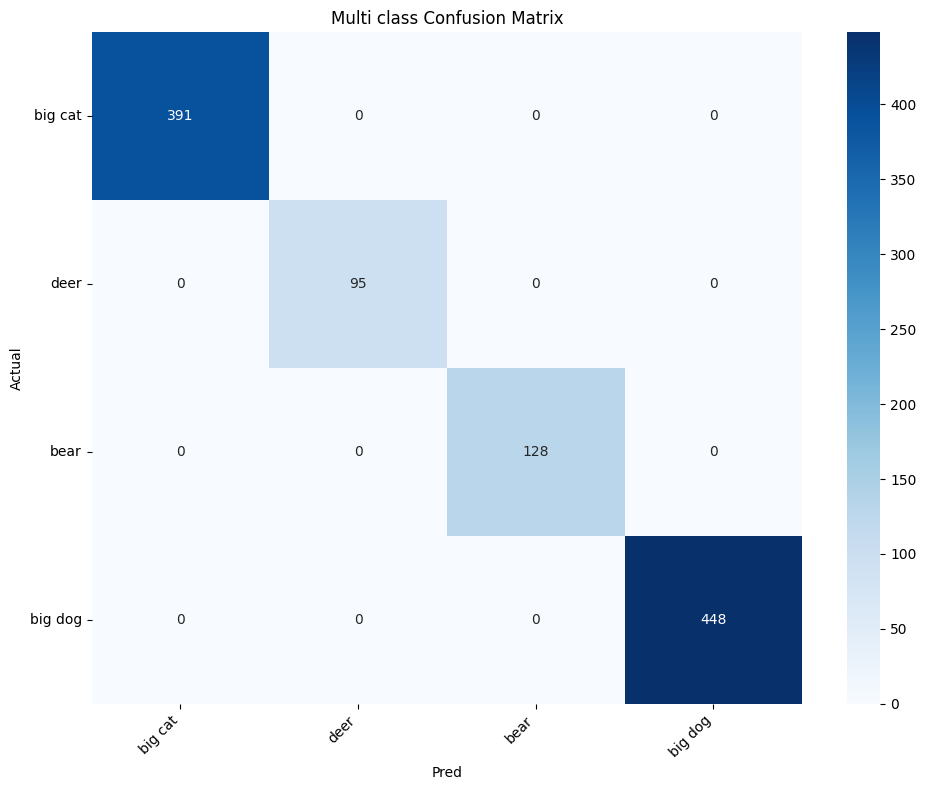

In [ ]:
if have_ground_truth:
    gt_dict = {item['image']: item['class'] for item in ground_truth}
    
    y_true = []
    y_pred = []
    y_pred_original = [] 
    class_names = list(CLASS_DIRS.keys())
    
    big_cats = ['tiger', 'lion', 'leopard', 'cheetah', 'jaguar', 'puma', 'lynx', 'cougar', 'panther', 'snow leopard']
    bears = ['bear', 'brown bear', 'polar bear', 'grizzly', 'black bear', 'panda', 'American_black_bear']
    deers = ['deer', 'elk', 'moose', 'reindeer', 'antelope', 'gazelle', 'impala']
    big_dogs = ['wolf', 'coyote', 'fox', 'hyena', 'jackal', 'dingo', 'wild dog']
    
    def standardized_class(pred_class):
        pred_lower = pred_class.lower()
        
        for animal in big_cats:
            if animal.lower() in pred_lower:
                return "big cat"
        
        for animal in bears:
            if animal.lower() in pred_lower:
                return "bear"
        
        for animal in deers:
            if animal.lower() in pred_lower:
                return "deer"
        
        for animal in big_dogs:
            if animal.lower() in pred_lower:
                return "big dog"
        
        return pred_class
    
    def is_correct_prediction(true_class, pred_class):
        if true_class == pred_class:
            return True
        
        standardized = standardized_class(pred_class)
        return standardized == true_class
    
    for img_path in all_test_images:
        img_name = os.path.basename(img_path)
        true_class = gt_dict.get(img_name, None)
        
        if true_class:
            y_true.append(true_class)
            
            pred_row = prediction_df[prediction_df['image'] == img_name]
            if not pred_row.empty:
                pred_class = pred_row.iloc[0]['class_name']
                y_pred_original.append(pred_class)  
                
                standardized_pred = standardized_class(pred_class)
                y_pred.append(standardized_pred)
            else:
                y_pred.append(None)
                y_pred_original.append(None)
    
    print("\nmetrics by Class:")
    for target_class in class_names:
        correct_preds = 0
        incorrect_preds = 0
        
        for i, true_class in enumerate(y_true):
            if true_class == target_class:
                if is_correct_prediction(true_class, y_pred_original[i]):
                    correct_preds += 1
                else:
                    incorrect_preds += 1
                    
        total = correct_preds + incorrect_preds
        accuracy = correct_preds / total if total > 0 else 0
        
        binary_true = [1 if c == target_class else 0 for c in y_true]
        binary_pred = [1 if is_correct_prediction(target_class, p) else 0 for p in y_pred_original]
        
        precision = precision_score(binary_true, binary_pred, zero_division=0)
        recall = recall_score(binary_true, binary_pred, zero_division=0)
        f1 = f1_score(binary_true, binary_pred, zero_division=0)
        
        print(f"\n{target_class.capitalize()} Metrics:")
        print(f"Total samples: {total}")
        print(f"Correct predictions: {correct_preds} ({correct_preds/total*100:.2f}%)")
        print(f"Incorrect predictions: {incorrect_preds} ({incorrect_preds/total*100:.2f}%)")
        print(f"Accuracy: {accuracy:.3f}")
        print(f"Precision: {precision:.3f}")
        print(f"Recall: {recall:.3f}")
        print(f"F1 Score: {f1:.3f}")
    
    total_correct = sum(1 for i, true_class in enumerate(y_true) 
                      if is_correct_prediction(true_class, y_pred_original[i]))
    total_samples = len(y_true)
    overall_accuracy = total_correct / total_samples if total_samples > 0 else 0
    
    standardized_y_pred = []
    for i, true_val in enumerate(y_true):
        orig_pred = y_pred_original[i]
        if is_correct_prediction(true_val, orig_pred):
            standardized_y_pred.append(true_val)
        else:
            standardized_y_pred.append(orig_pred)
    
    macro_precision = precision_score(y_true, standardized_y_pred, average='macro', zero_division=0)
    macro_recall = recall_score(y_true, standardized_y_pred, average='macro', zero_division=0)
    macro_f1 = f1_score(y_true, standardized_y_pred, average='macro', zero_division=0)
    
    weighted_precision = precision_score(y_true, standardized_y_pred, average='weighted', zero_division=0)
    weighted_recall = recall_score(y_true, standardized_y_pred, average='weighted', zero_division=0)
    weighted_f1 = f1_score(y_true, standardized_y_pred, average='weighted', zero_division=0)
    
    print("\n== Overall Metrics ==")
    print(f"Total samples: {total_samples}")
    print(f"Correct predictions: {total_correct} ({total_correct/total_samples*100:.2f}%)")
    print(f"Overall accuracy: {overall_accuracy:.3f}")
    print("\nMacro Average (treat all classes equally):")
    print(f"Precision: {macro_precision:.3f}")
    print(f"Recall: {macro_recall:.3f}")
    print(f"F1 Score: {macro_f1:.3f}")
    print("\nWeighted Average (weighted by class support):")
    print(f"Precision: {weighted_precision:.3f}")
    print(f"Recall: {weighted_recall:.3f}")
    print(f"F1 Score: {weighted_f1:.3f}")
    
    # Continue with confusion matrix
    cm = confusion_matrix(y_true, standardized_y_pred, labels=class_names)
    
    plt.figure(figsize=(10, 8))
    ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names,
                yticklabels=class_names)
    
    plt.ylim(len(class_names), 0)    
    plt.xlabel('Pred')
    plt.ylabel('Actual')
    plt.title('Multi class Confusion Matrix')
    
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    
    plt.tight_layout()
    plt.show()

## Visualizing Results

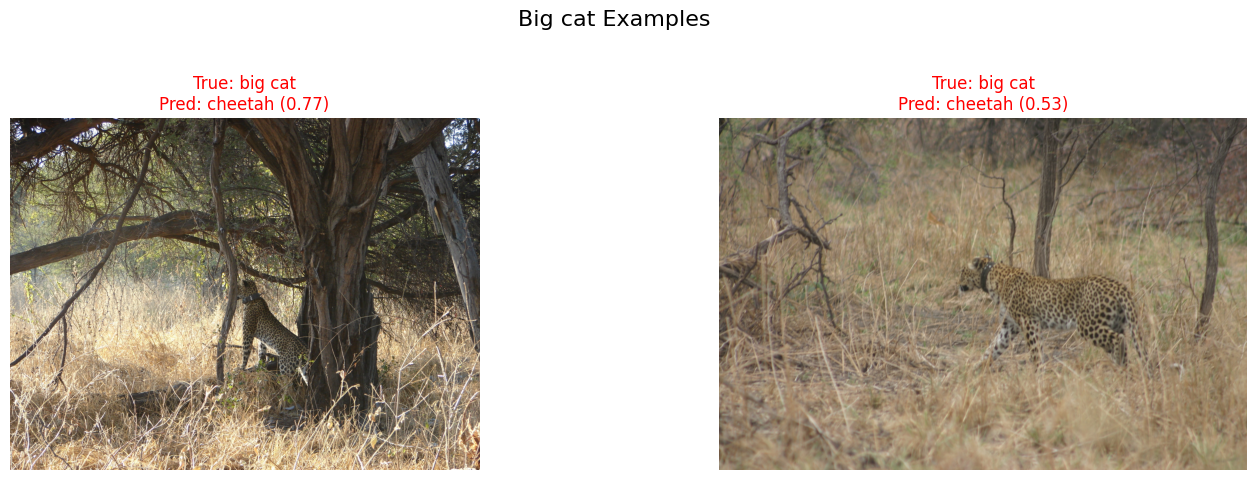

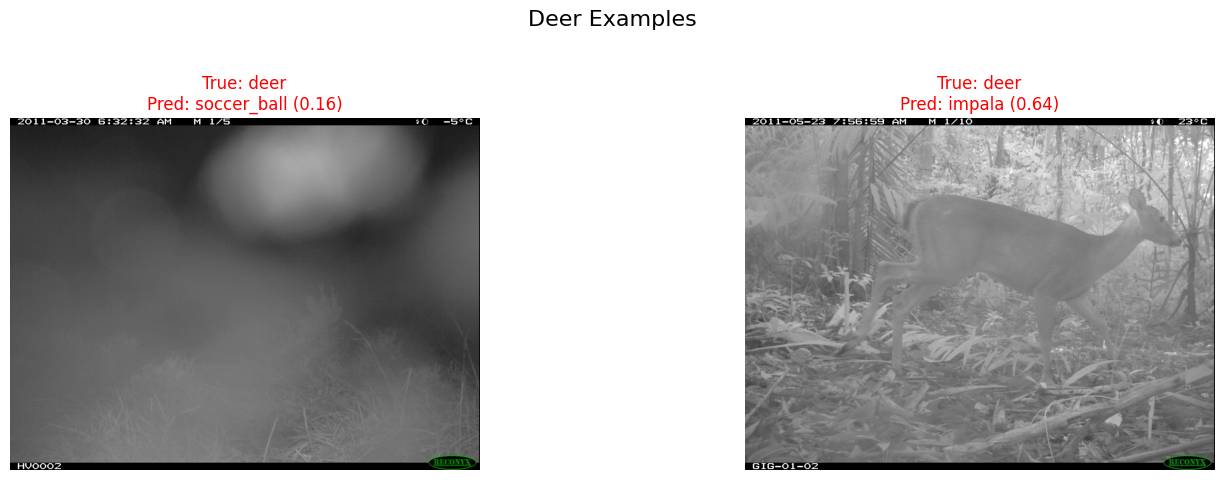

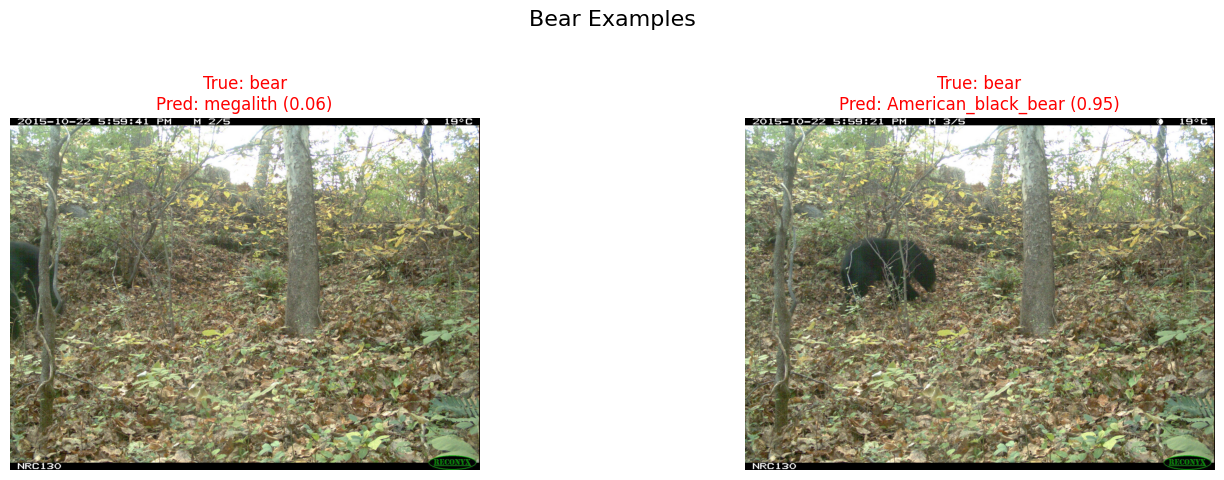

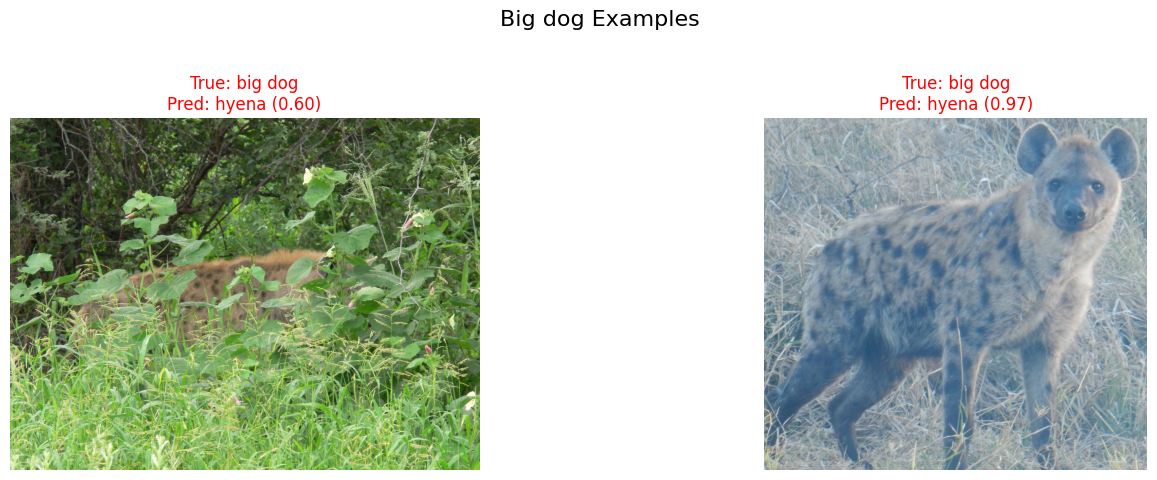

In [10]:
def plot_classification_examples(results_list, test_images_by_class, num_per_class=2):
    for class_name in CLASS_DIRS.keys():
        class_paths = test_images_by_class[class_name]
        if not class_paths:
            continue
            
        samples = class_paths[:num_per_class]
        fig, axs = plt.subplots(1, len(samples), figsize=(15, 5))
        if len(samples) == 1:
            axs = [axs]  
            
        fig.suptitle(f"{class_name.capitalize()} Examples", fontsize=16)
        
        for i, img_path in enumerate(samples):
            img_name = os.path.basename(img_path)
            pred_row = prediction_df[prediction_df['image'] == img_name]
            pred_class = pred_row.iloc[0]['class_name'] if not pred_row.empty else 'Unknown'
            confidence = pred_row.iloc[0]['confidence'] if not pred_row.empty else 0
            
            img = Image.open(img_path)
            axs[i].imshow(img)
            
            color = 'green' if pred_class == class_name else 'red'
            title = f"True: {class_name}\nPred: {pred_class} ({confidence:.2f})"
            axs[i].set_title(title, color=color)
            axs[i].axis('off')
            
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()
        
plot_classification_examples(results_list, test_images_by_class)